# Harshitha Bannur

## Research question/interests

Among the many categories of analysis I was interested in regarding this dataset, I think I would like to focus on how the numbers between female and male workers vary amongst those who report mental health issues. I would also then like to compare these numbers to those who have care options and those who don't, along with the use of the data regarding 'mental-health consequence' to investigate how the importance workers give their mental health and how this varies among men and women in the workplace

My research question is: **Is there a relationship between the mental health issues women and men face and how important they think their mental health is to their well-being at the workplace?**

To plan this, I'm thinking of dropping columns that may not be relevant to my research such as the family history, or the timestamp, physical health consequence and such columns. Since most of the columns are reported from the US, it would be beneficial to focus on workers just in the US to also identify trends in their care systems and policies to see how it affects mental health differently between the two genders if needed. I will filter out the records only in the USA for this. Further more, I will answer my question by doing a count of men and women who report mental health issues to see the initial variance in numbers. I will then use the other data about their leave policies, treatment, self-employment, mental health consequence to make a judgement on how men and women's varying attitude on mental health may affect their well-being at the workplace.


## My Code:

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv("../data/raw/mental health in tech.csv")
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


##### What each of the columns mean:

- Age

- Gender

- Country

- state: If you live in the United States, which state or territory do you live in?

- self_employed: Are you self-employed?

- family_history: Do you have a family history of mental illness?

- treatment: Have you sought treatment for a mental health condition?

- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

- no_employees: How many employees does your company or organization have?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- tech_company: Is your employer primarily a tech company/organization?

- benefits: Does your employer provide mental health benefits?

- care_options: Do you know the options for mental health care your employer provides?

- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- leave: How easy is it for you to take medical leave for a mental health condition?

- mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

- phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

- coworkers: Would you be willing to discuss a mental health issue with your coworkers?

- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

- phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

- mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

- comments: Any additional notes or comments

### **An EDA of the dataset:**

In [ ]:
#Understanding my dataset
shape=df.shape
columns=df.columns

print(shape)
print(columns)

(1259, 27)
Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [ ]:
profile = ProfileReport(df)
profile

C:\Users\User\miniconda3\lib\multiprocessing\pool.py:478: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  iterable = list(iterable)
C:\Users\User\AppData\Local\Temp\ipykernel_16468\1830533479.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  profile = ProfileReport(df)
C:\Users\User\AppData\Local\Temp\ipykernel_16468\1830533479.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  profile = ProfileReport(df)


TypeError: concat() got an unexpected keyword argument 'join_axes'

In [ ]:
#Dropping columns not relevant to my research:

df2=df.drop(['Timestamp','Age', 'self_employed','state','family_history', 'no_employees','remote_work',
              'comments', 'obs_consequence'], axis=1)
df2.head()

,Gender,Country,treatment,work_interfere,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
0,Female,United States,Yes,Often,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes
1,M,United States,No,Rarely,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know
2,Male,Canada,No,Rarely,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No
3,Male,United Kingdom,Yes,Often,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No
4,Male,United States,No,Never,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know


In [ ]:
# to focus my dataset, I will filter through results only in the United States
df3=df2[df2["Country"].str.contains("United States")]

# and now filter for only workers in tech companies
data=df3.loc[df3['tech_company'] == 'Yes']
data.head(5)

,Gender,Country,treatment,work_interfere,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
0,Female,United States,Yes,Often,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes
4,Male,United States,No,Never,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know
5,Male,United States,No,Sometimes,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know
6,Female,United States,Yes,Sometimes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know
8,Female,United States,Yes,Sometimes,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No


In [ ]:
# I can now save this as it's own repsective dataset to work off of
from pathlib import Path  
filepath = Path('../data/processed/analysis_2_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)


### **Possible Visualizations:**

In [ ]:
data = pd.read_csv("../data/processed/analysis_2_data.csv")

In [ ]:
#Is there a differening frequency of men, women, non-binary and the other frequency seeking treatment for their mental illnesses:

#Getting a count of males
g=pd.crosstab(index=data['Gender'], columns='count')
g

#Cleaning this row to create 3 variables of Gender: Male, Female, Non-binary and other.

col_0,count
Gender,
Cis Female,1
Cis Male,2
F,28
Femake,1
Female,63
Female,2
Female (cis),1
Female (trans),1
Genderqueer,1


In [ ]:
#drop the rows with ínnaplicabble gender idenity:
data = data.drop(data[(data['Gender'] == 'Nah') | (data['Gender'] == 'p')].index)
data.head()

,Unnamed: 0,Gender,Country,treatment,work_interfere,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
0,0,Female,United States,Yes,Often,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes
1,4,Male,United States,No,Never,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know
2,5,Male,United States,No,Sometimes,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know
3,6,Female,United States,Yes,Sometimes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know
4,8,Female,United States,Yes,Sometimes,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No


In [ ]:
#putting together the relevant genders
Males= ['Cis Male', 'M', 'Mail', 'Make', 'Male', 'Male ', 'Male (CIS)', 'cis male', 'm', 'Man',  
        'maile', 'male', 'msle']

x = g.loc[Males]
print(x)

col_0       count
Gender           
Cis Male        2
M              76
Mail            1
Make            4
Male          290
Male            1
Male (CIS)      1
cis male        1
m              13
Man             1
maile           1
male           71
msle            1


In [ ]:
Females= ['Cis Female', 'F', 'Femake', 'Female', 'Female ', 'Female (cis)', 'f', 'female', 'Woman']

y= g.loc[Females]
print(y)

col_0         count
Gender             
Cis Female        1
F                28
Femake            1
Female           63
Female            2
Female (cis)      1
f                 8
female           35
Woman             1


In [ ]:
Nonbinary_and_trans= ['Female (trans)', 'Genderqueer', 'Male-ish', 'Trans-female', 'non-binary', 'queer/she/they']
z= g.loc[Nonbinary_and_trans]
print(z)

col_0           count
Gender               
Female (trans)      1
Genderqueer         1
Male-ish            1
Trans-female        1
non-binary          1
queer/she/they      1


In [ ]:
#rename all the differing labels for Male to 'Male', and etc for female and non-binary categories:
data['Gender'] = data['Gender'].replace(['Cis Male', 'M', 'Mail', 'Make', 'Male ', 'Male (CIS)', 'cis male', 'm', 'Man',  
        'maile', 'male', 'msle'],'Male')

data['Gender']= data['Gender']. replace(['Cis Female', 'F', 'Femake', 'Female ', 'Female (cis)', 'f', 'female', 'Woman'], 'Female')
data['Gender']= data['Gender']. replace(['Female (trans)', 'Genderqueer', 'Male-ish', 'Trans-female', 'non-binary', 'queer/she/they'], 'Non-binary_or_trans_or_other')

data.head()


,Unnamed: 0,Gender,Country,treatment,work_interfere,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
0,0,Female,United States,Yes,Often,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes
1,4,Male,United States,No,Never,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know
2,5,Male,United States,No,Sometimes,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know
3,6,Female,United States,Yes,Sometimes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know
4,8,Female,United States,Yes,Sometimes,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No


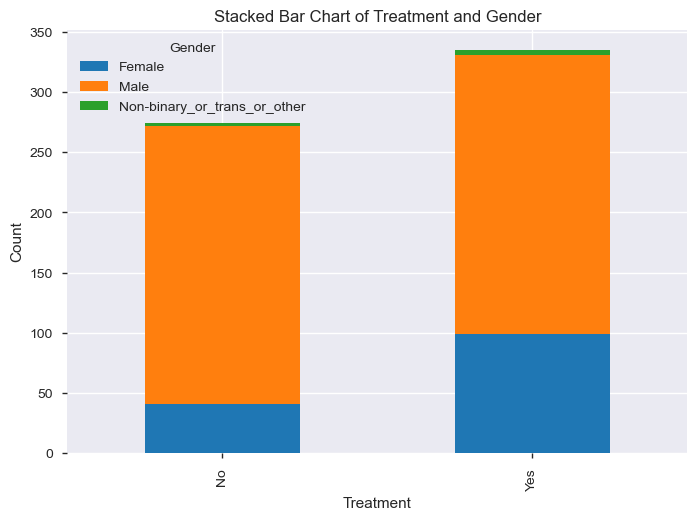

In [ ]:
# Count the frequency of each unique combination of values in the "treatment" and "gender" columns
treatment_gender_counts = data.groupby(['treatment', 'Gender']).size().unstack()

# Create a stacked bar chart of the treatment and gender counts
treatment_gender_counts.plot(kind='bar', stacked=True)
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Treatment and Gender')
plt.legend(title='Gender', loc='upper left')
plt.show()

In [ ]:
#Analysis?


In [ ]:
#More EDA?
#Another aspect of the EDA for analysis is the mental_health_consequence one. Is there a relationship between Gender and how they think of their mental health consequence at work?

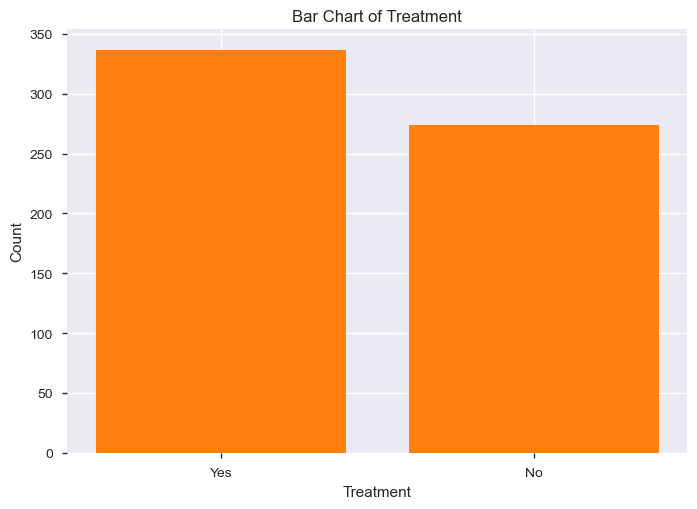

In [ ]:
# Count the frequency of each unique value in the "treatment" column
treatment_counts = data['treatment'].value_counts()

# Create a bar chart of the treatment counts
plt.bar(treatment_counts.index, treatment_counts.values)
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.title('Bar Chart of Treatment')
plt.show()